# Calculation of Forwards and Backwards Lyapunov Vectors
Displaying how to calculate the Lyapunov exponents for some common dynamical systems

We start by setting the folder where the python scripts are stored, and then import the required packages

In [1]:
import os, sys
sys.path.extend([os.path.abspath('../lyp/')])

In [2]:
import numpy as np

import matplotlib.pyplot as plt


from common_systems import lorenz
from lyapunov_calcs import Lyapunov

We set the dynamical system to the Lorenz 1969 system

In [3]:
lorenz_sys = lorenz()

We can check the equations and parameters used in this system

In [4]:
lorenz_sys.print_system()

DynamicalSystem Parameters:
'time': t,
'variables': [x, y, z],
'parameters': [sigma, rho, beta],
'parm_vals': [10.0, 28.0, 2.6666666666666665],
'equations': [sigma*(-x + y), x*(rho - z) - y, -beta*z + x*y],
'model_dims': (3, 3),
'substitutions': [],
'jacobian': 'time': t,
'variables': [x, y, z],
'parameters': [sigma, rho, beta],
'parm_vals': [10.0, 28.0, 2.6666666666666665],
'equations': [[-sigma, rho - z, y], [sigma, -1, x], [0, -x, -beta]],
'model_dims': (None, None),
'substitutions': [],
,



The system parameters can be reset as follows:

In [5]:
lorenz_sys.update_parameters([1, 2, 3])
lorenz_sys.print_system()

DynamicalSystem Parameters:
'time': t,
'variables': [x, y, z],
'parameters': [sigma, rho, beta],
'parm_vals': [1, 2, 3],
'equations': [sigma*(-x + y), x*(rho - z) - y, -beta*z + x*y],
'model_dims': (3, 3),
'substitutions': [],
'jacobian': 'time': t,
'variables': [x, y, z],
'parameters': [sigma, rho, beta],
'parm_vals': [1, 2, 3],
'equations': [[-sigma, rho - z, y], [sigma, -1, x], [0, -x, -beta]],
'model_dims': (None, None),
'substitutions': [],
,



We will take the standard Lorenz parameters for this example

In [6]:
lorenz_sys.update_parameters([10., 28., 8/3])

We now use the Lyapunov class to calculate the exponents, this is done by passing the system into the Lyapunov class.
We can then choose whether we calculate the forward or backwards Lyapunov vectors. The forward and backwards Lyapunov exponents are calculated in different ways, but should provide the same answer (usually not exactly the same in practice however). 

In [7]:
lyap = Lyapunov(lorenz_sys)

We can speed up the following calculations by doing them once, and then pointing at the class containing the data, rather than re-calculating the exponents each time. This is not required however.

In [8]:
fwd = lyap.forwards
bkw = lyap.backwards

fwd._set_data()
bkw._set_data()

In [9]:
np.set_printoptions(precision=4, suppress=True)
print(fwd.exponents_average())
print(bkw.exponents_average())

[  0.8878  -0.0019 -14.5526]
[  0.9011  -0.0332 -14.5346]


There is also a method to find just the largest Lyapunov exponent which uses a more light weight numerical method and is therefore faster. Note the calculation method is the same for the forward and backwards vectors.

In [10]:
mx_exp = fwd.max_lyapunov_exp()
print(mx_exp)

0.9207163794768785


The Lyapunov class also contains tools for visualising the results

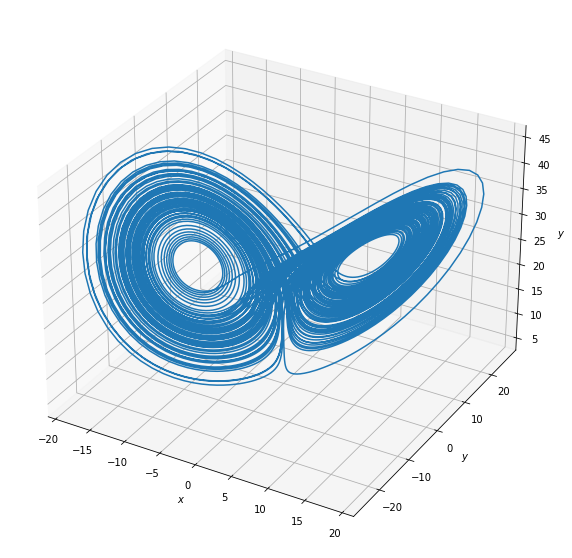

In [11]:
lyap.plot_trajectory()

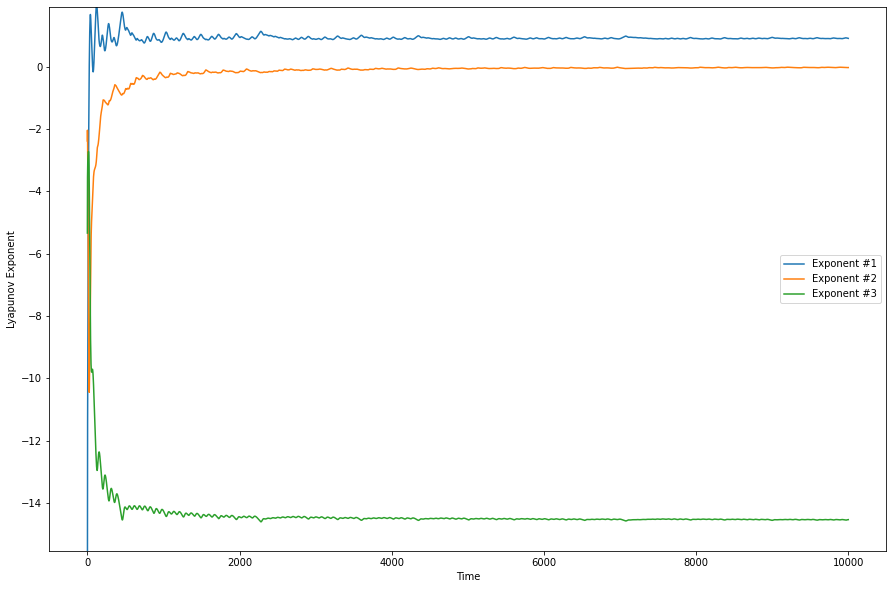

In [12]:
bkw.plot_exponents(y_lims=True)

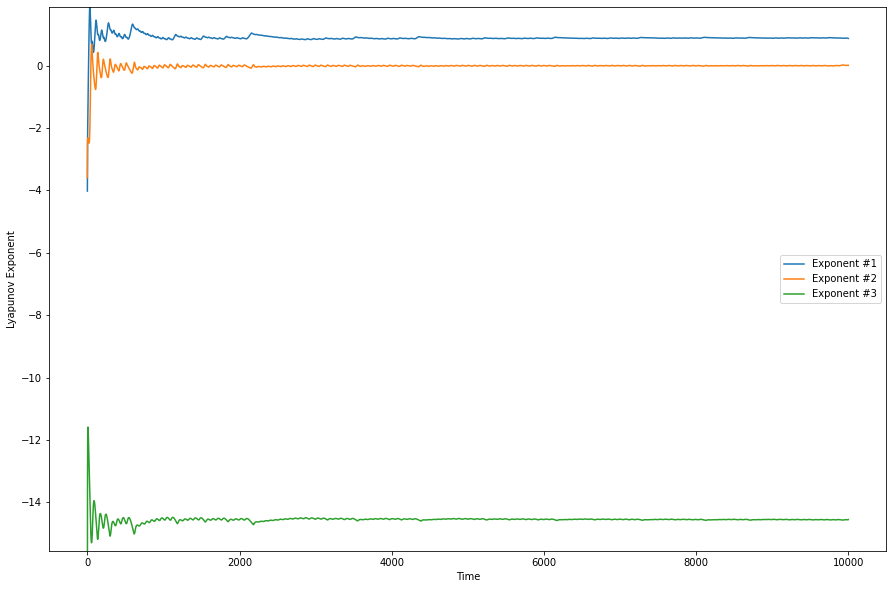

In [13]:
fwd.plot_exponents(y_lims=True)

We can plot these on top of each other also, but this is more manual:

In [14]:
bkw.set_params({'max_time': 50})
fwd.set_params({'max_time': 50})
fwd._set_data()
bkw._set_data()
bkw.print_params()

Non-Covarient Parameters:
'dim': (3, 3),
'min_time': 0,
'max_time': 50,
'time_step': 0.01,
'ini_point': None,
'num_steps': 5000,
'system_functions': [<function _lambdifygenerated at 0x7f5085606700>, <function _lambdifygenerated at 0x7f50877134c0>, <function _lambdifygenerated at 0x7f5085605670>],
'jacobian_functions': [<function _lambdifygenerated at 0x7f50856053a0>, <function _lambdifygenerated at 0x7f5085605af0>, <function _lambdifygenerated at 0x7f5085605e50>, <function _lambdifygenerated at 0x7f5087711820>, <function _lambdifygenerated at 0x7f50856449d0>, <function _lambdifygenerated at 0x7f50855f6ca0>, <function _lambdifygenerated at 0x7f50855f6040>, <function _lambdifygenerated at 0x7f50856083a0>, <function _lambdifygenerated at 0x7f5085608790>],
'exp': [[     nan      nan      nan]
 [-16.8822  -5.0011  -5.4444]
 [-11.2501  -5.1191  -4.1266]
 ...
 [  0.93    -0.0486 -14.548 ]
 [  0.9302  -0.0486 -14.5482]
 [  0.9304  -0.0487 -14.5483]],
'vec': [[[ 1.      0.      0.    ]
  [ 0.  

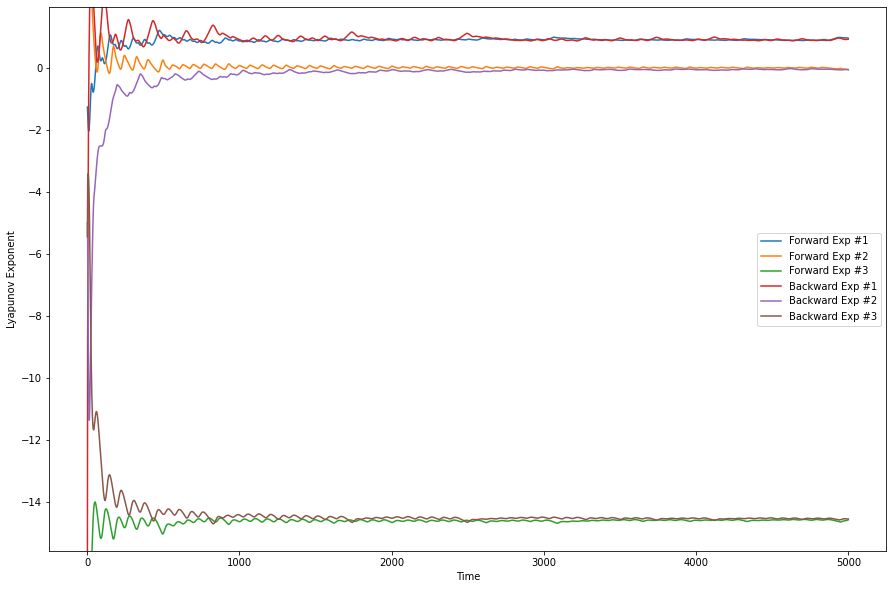

In [15]:
from visualisations import plot_both_exponents

plot_both_exponents(fwd.exp, bkw.exp, y_lims=True)

We can use a function `exponent_alter_param` to visualise how the Lyapunov exponents change as a certain parameter is altered.

**Note:** This is very slow and still a work in progress

In [16]:
from sympy import symbols 

rho = symbols('rho')
bkw.print_params()

Non-Covarient Parameters:
'dim': (3, 3),
'min_time': 0,
'max_time': 50,
'time_step': 0.01,
'ini_point': None,
'num_steps': 5000,
'system_functions': [<function _lambdifygenerated at 0x7f5085606700>, <function _lambdifygenerated at 0x7f50877134c0>, <function _lambdifygenerated at 0x7f5085605670>],
'jacobian_functions': [<function _lambdifygenerated at 0x7f50856053a0>, <function _lambdifygenerated at 0x7f5085605af0>, <function _lambdifygenerated at 0x7f5085605e50>, <function _lambdifygenerated at 0x7f5087711820>, <function _lambdifygenerated at 0x7f50856449d0>, <function _lambdifygenerated at 0x7f50855f6ca0>, <function _lambdifygenerated at 0x7f50855f6040>, <function _lambdifygenerated at 0x7f50856083a0>, <function _lambdifygenerated at 0x7f5085608790>],
'exp': [[     nan      nan      nan]
 [-16.8822  -5.0011  -5.4444]
 [-11.2501  -5.1191  -4.1266]
 ...
 [  0.93    -0.0486 -14.548 ]
 [  0.9302  -0.0486 -14.5482]
 [  0.9304  -0.0487 -14.5483]],
'vec': [[[ 1.      0.      0.    ]
  [ 0.  

In [17]:
%%time
exps = bkw.exponent_alter_param(rho, 0, 100, 500)

CPU times: user 10min 15s, sys: 4.44 s, total: 10min 19s
Wall time: 10min 15s


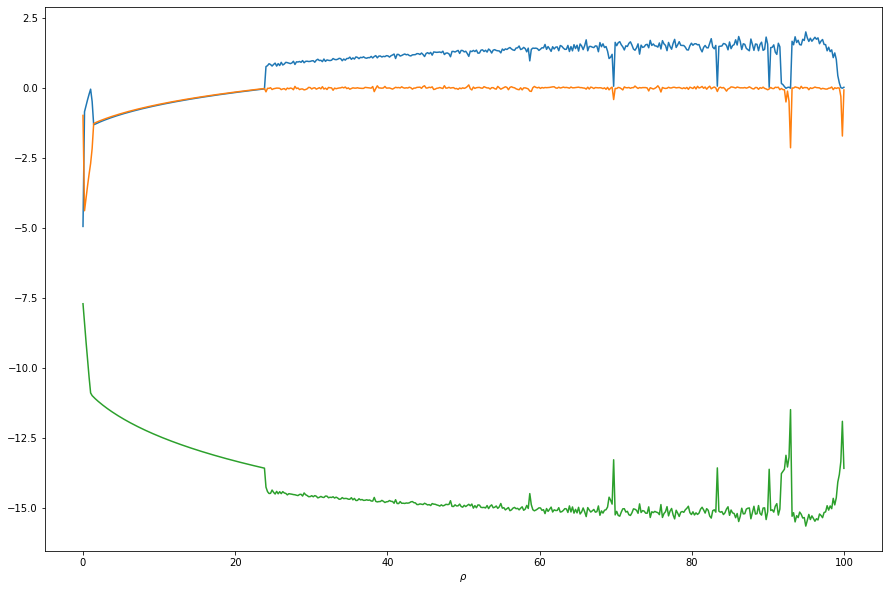

In [18]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot()
ax.plot(np.linspace(0, 100, 500), exps)
ax.set_xlabel("$\\rho$")
plt.show()